# Apply TF-IDF Clustering Algorithm

In [1]:
# import libraries
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# import libraries for algorithm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [7]:
# import the dataset
df = pd.read_csv('descriptions-cleaned.csv')

In [8]:
# get rid of extraneous index column
df = df['description']

THIS WOULD BE BETTER WITH LIST COMPREHENSION AND A LAMBDA FUNCTION, make a new "clean" column

In [17]:
# remove punctuation from the string because the lists were imported as strings and we don't need the commas and quotes
for i in range (0, len(df)):
    desc = df[i]   
    desc = re.sub("[^A-Za-z]+", " ", desc)
    df[i] = desc

In [18]:
df

0         unique dish moulded slabs bisque fired glazed...
1         unique pinch pot bisque fired glazed allow di...
2         unique bowl bisque fired glazed allow differe...
3         unique pinch pot bisque fired glazed allow di...
4         unique moulded slabs bisque fired glazed allo...
                               ...                        
11995     stylish studio vase brown glaze incised easte...
11996     free tracking included crafted holm denmark g...
11997     vintage thrown salt glaze drip effect blue br...
11998     stunning retro style mug rich brown rust beig...
11999     this is a hand built ceramic vase measures x ...
Name: description, Length: 12000, dtype: object

TD-IDF Vectorization

In [19]:
# initialize the vectorizer
vector = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)

In [20]:
# Apply vectorizer and save array of vectors in V
V = vector.fit_transform(df)

In [21]:
V.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Apply K-means algorithm

In [22]:
# intialize k-means
kmeans = KMeans(n_clusters=10, random_state=42)

In [23]:
# fit the model to the vectors
kmeans.fit(V)

KMeans(n_clusters=10, random_state=42)

In [24]:
# store cluster labels in a variable
clusters = kmeans.labels_

In [25]:
#look at the cluster labels
[c for c in clusters][:20]

[1, 1, 1, 1, 1, 1, 3, 3, 1, 3, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0]

Dimension Reduction and Visualization

In [26]:
# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)

In [27]:
# pass the vectors to the pca and store the vectors
vectorsPCA = pca.fit_transform(V.toarray())

In [28]:
# save the two dimensions
xD = vectorsPCA[:, 0]
yD = vectorsPCA[:, 1]

In [29]:
len(df)

12000

In [30]:
# add vectors and clusters to the dataframe
df['cluster'] = clusters
df['xD'] = xD
df['yD'] = yD

Visualize

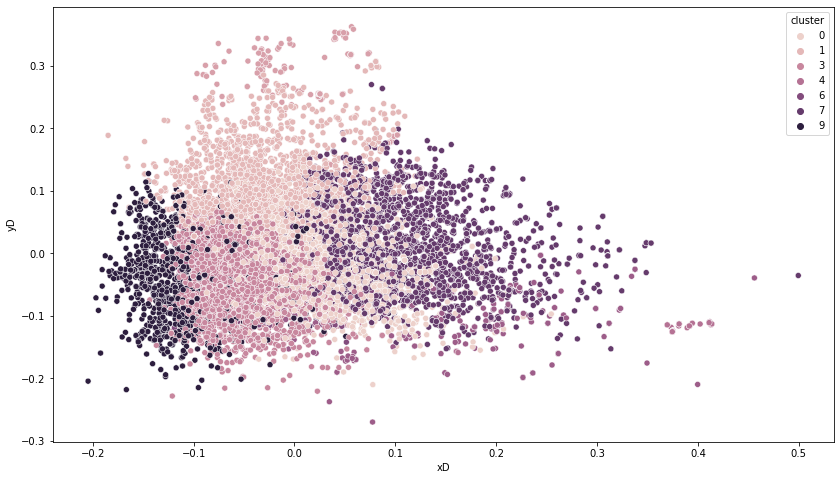

In [31]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x="xD", y="yD", hue='cluster')
plt.show()

In [32]:
def top_words(n):
    words_df = pd.DataFrame(V.todense()).groupby(clusters).mean()
    words = vector.get_feature_names()
    for i,r in words_df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([words[w] for w in np.argsort(r)[-n:]]))

This is nonsense!  Try something other than K-means, try the algorithm on the titles, join the titles and description together?

In [33]:
top_words(10)


Cluster 0
oven,fired,thrown,wheel,glaze,microwave,dishwasher,food,safe,bowl

Cluster 1
unique,contact,gift,plate,free,safe,order,www,com,shop

Cluster 2
accents,bohonpottery,contact,com,mugs,canada,order,days,structure,business

Cluster 3
blue,tall,small,pot,unique,white,glazed,fired,vase,glaze

Cluster 4
refrigerator,city,two,subjected,oklahoma,heated,unique,rapid,fare,products

Cluster 5
fired,amount,food,tall,mug,thrown,wheel,microwave,dishwasher,safe

Cluster 6
geo,guccione,within,artist,pot,usps,international,mail,california,signed

Cluster 7
handle,glaze,mugs,tea,microwave,dishwasher,safe,cup,coffee,mug

Cluster 8
ensures,techniques,cleaning,sandy,gallery,priceless,ease,wildcrowfarm,california,northern

Cluster 9
photos,signed,shop,tall,excellent,good,cracks,chips,condition,vintage
